# 準備

## Googleドライブのマウント

## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [16]:
import sys
sys.path.append('../common')
sys.path.append('../data')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.25666666666666665
                : 10. 正答率(テスト) = 0.2001
Generation: 20. 正答率(トレーニング) = 0.3333333333333333
                : 20. 正答率(テスト) = 0.2472
Generation: 30. 正答率(トレーニング) = 0.43
                : 30. 正答率(テスト) = 0.3034
Generation: 40. 正答率(トレーニング) = 0.5066666666666667
                : 40. 正答率(テスト) = 0.3614
Generation: 50. 正答率(トレーニング) = 0.5833333333333334
                : 50. 正答率(テスト) = 0.417
Generation: 60. 正答率(トレーニング) = 0.63
                : 60. 正答率(テスト) = 0.4661
Generation: 70. 正答率(トレーニング) = 0.69
                : 70. 正答率(テスト) = 0.5094
Generation: 80. 正答率(トレーニング) = 0.7166666666666667
                : 80. 正答率(テスト) = 0.5339
Generation: 90. 正答率(トレーニング) = 0.7433333333333333
                : 90. 正答率(テスト) = 0.5706
Generation: 100. 正答率(トレーニング) = 0.8166666666666667
                : 100. 正答率(テスト) = 0.6014
Generation: 110. 正答率(トレーニング) = 0.83
                : 110. 正答率(テスト) = 0.6192
Generation: 120. 正答率(トレーニング) = 0.85
                : 120. 正答率(

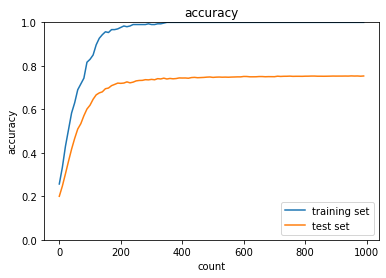

In [17]:
import numpy as np
#from common import layers
import layers
from collections import OrderedDict
#from common import functions
import functions
#from data.mnist import load_mnist
from mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
#from common import optimizer
import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1248
Generation: 20. 正答率(トレーニング) = 0.24
                : 20. 正答率(テスト) = 0.1971
Generation: 30. 正答率(トレーニング) = 0.38333333333333336
                : 30. 正答率(テスト) = 0.2808
Generation: 40. 正答率(トレーニング) = 0.47
                : 40. 正答率(テスト) = 0.3453
Generation: 50. 正答率(トレーニング) = 0.5166666666666667
                : 50. 正答率(テスト) = 0.3806
Generation: 60. 正答率(トレーニング) = 0.55
                : 60. 正答率(テスト) = 0.4073
Generation: 70. 正答率(トレーニング) = 0.59
                : 70. 正答率(テスト) = 0.4288
Generation: 80. 正答率(トレーニング) = 0.59
                : 80. 正答率(テスト) = 0.4461
Generation: 90. 正答率(トレーニング) = 0.6466666666666666
                : 90. 正答率(テスト) = 0.4781
Generation: 100. 正答率(トレーニング) = 0.7066666666666667
                : 100. 正答率(テスト) = 0.5168
Generation: 110. 正答率(トレーニング) = 0.7033333333333334
                : 110. 正答率(テスト) = 0.5374
Generation: 120. 正答率(トレーニング) = 0.7033333333333334
                : 120. 正答率(テスト) = 0.5428

Generation: 980. 正答率(トレーニング) = 0.9066666666666666
                : 980. 正答率(テスト) = 0.7182
Generation: 990. 正答率(トレーニング) = 0.91
                : 990. 正答率(テスト) = 0.7267
Generation: 1000. 正答率(トレーニング) = 0.9133333333333333
                : 1000. 正答率(テスト) = 0.7231


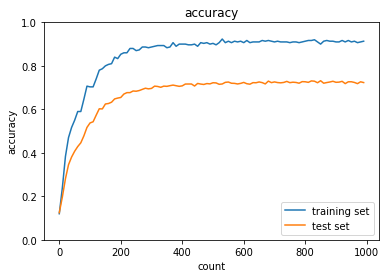

In [25]:
#from common import optimizer
import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5866666666666667
                : 10. 正答率(テスト) = 0.4234
Generation: 20. 正答率(トレーニング) = 0.53
                : 20. 正答率(テスト) = 0.3909
Generation: 30. 正答率(トレーニング) = 0.6633333333333333
                : 30. 正答率(テスト) = 0.5413
Generation: 40. 正答率(トレーニング) = 0.5433333333333333
                : 40. 正答率(テスト) = 0.4491
Generation: 50. 正答率(トレーニング) = 0.6966666666666667
                : 50. 正答率(テスト) = 0.5237
Generation: 60. 正答率(トレーニング) = 0.5833333333333334
                : 60. 正答率(テスト) = 0.4807
Generation: 70. 正答率(トレーニング) = 0.6933333333333334
                : 70. 正答率(テスト) = 0.5863
Generation: 80. 正答率(トレーニング) = 0.7233333333333334
                : 80. 正答率(テスト) = 0.6109
Generation: 90. 正答率(トレーニング) = 0.7366666666666667
                : 90. 正答率(テスト) = 0.6357
Generation: 100. 正答率(トレーニング) = 0.73
                : 100. 正答率(テスト) = 0.5992
Generation: 110. 正答率(トレーニング) = 0.5833333333333334
                : 110. 正答率(テスト) = 0.452
Generation: 120. 正答率(トレーニング) = 0.656

Generation: 960. 正答率(トレーニング) = 0.34
                : 960. 正答率(テスト) = 0.3006
Generation: 970. 正答率(トレーニング) = 0.6433333333333333
                : 970. 正答率(テスト) = 0.4959
Generation: 980. 正答率(トレーニング) = 0.7766666666666666
                : 980. 正答率(テスト) = 0.5906
Generation: 990. 正答率(トレーニング) = 0.6933333333333334
                : 990. 正答率(テスト) = 0.5652
Generation: 1000. 正答率(トレーニング) = 0.7966666666666666
                : 1000. 正答率(テスト) = 0.5813


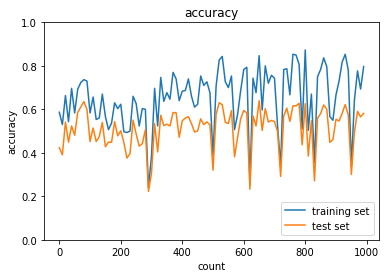

In [24]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [20]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16333333333333333
                : 10. 正答率(テスト) = 0.1262
Generation: 20. 正答率(トレーニング) = 0.34
                : 20. 正答率(テスト) = 0.2579
Generation: 30. 正答率(トレーニング) = 0.5866666666666667
                : 30. 正答率(テスト) = 0.4835
Generation: 40. 正答率(トレーニング) = 0.6266666666666667
                : 40. 正答率(テスト) = 0.5116
Generation: 50. 正答率(トレーニング) = 0.7066666666666667
                : 50. 正答率(テスト) = 0.6184
Generation: 60. 正答率(トレーニング) = 0.8033333333333333
                : 60. 正答率(テスト) = 0.6535
Generation: 70. 正答率(トレーニング) = 0.83
                : 70. 正答率(テスト) = 0.697
Generation: 80. 正答率(トレーニング) = 0.87
                : 80. 正答率(テスト) = 0.7145
Generation: 90. 正答率(トレーニング) = 0.93
                : 90. 正答率(テスト) = 0.7411
Generation: 100. 正答率(トレーニング) = 0.9366666666666666
                : 100. 正答率(テスト) = 0.7454
Generation: 110. 正答率(トレーニング) = 0.9633333333333334
                : 110. 正答率(テスト) = 0.7576
Generation: 120. 正答率(トレーニング) = 0.9733333333333334
             

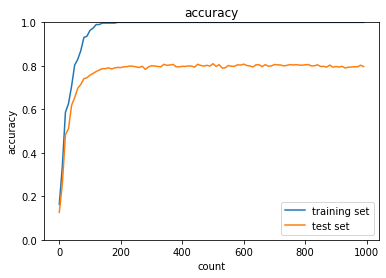

In [23]:
#from common import optimizer
import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.16666666666666666
                : 20. 正答率(テスト) = 0.1178
Generation: 30. 正答率(トレーニング) = 0.22666666666666666
                : 30. 正答率(テスト) = 0.1379
Generation: 40. 正答率(トレーニング) = 0.24666666666666667
                : 40. 正答率(テスト) = 0.1561
Generation: 50. 正答率(トレーニング) = 0.28
                : 50. 正答率(テスト) = 0.1798
Generation: 60. 正答率(トレーニング) = 0.31333333333333335
                : 60. 正答率(テスト) = 0.2066
Generation: 70. 正答率(トレーニング) = 0.35333333333333333
                : 70. 正答率(テスト) = 0.2338
Generation: 80. 正答率(トレーニング) = 0.37333333333333335
                : 80. 正答率(テスト) = 0.2555
Generation: 90. 正答率(トレーニング) = 0.41333333333333333
                : 90. 正答率(テスト) = 0.2906
Generation: 100. 正答率(トレーニング) = 0.43333333333333335
                : 100. 正答率(テスト) = 0.3075
Generation: 110. 正答率(トレーニング) = 0.46
                : 110. 正答率(テスト) = 0.332
Generation: 120. 正答率(トレーニング

Generation: 960. 正答率(トレーニング) = 0.97
                : 960. 正答率(テスト) = 0.7672
Generation: 970. 正答率(トレーニング) = 0.9766666666666667
                : 970. 正答率(テスト) = 0.7651
Generation: 980. 正答率(トレーニング) = 0.9733333333333334
                : 980. 正答率(テスト) = 0.7699
Generation: 990. 正答率(トレーニング) = 0.9733333333333334
                : 990. 正答率(テスト) = 0.7674
Generation: 1000. 正答率(トレーニング) = 0.9733333333333334
                : 1000. 正答率(テスト) = 0.7702


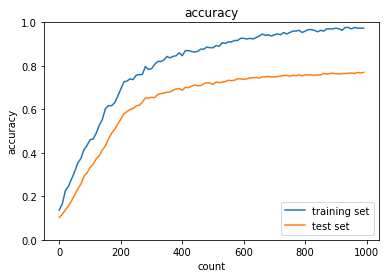

In [22]:
#from common import optimizer
import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()